<a href="https://colab.research.google.com/github/fidanismayilzada23/Data-Analytics-Google-Colab-Workbooks/blob/main/Studentscoreanaliz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.shape

(1000, 8)

In [5]:
#ümumi melumatları.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
#setir sayı
len(df)

1000

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#null deyerlerin sayı
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [9]:
#duplikat deyerlerin sayı
df.duplicated().sum()

np.int64(0)

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df['total score']=df['math score']+df['reading score']+df['writing score']

In [12]:
df['average score']=(df['total score']/3).round()

In [13]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'average score'],
      dtype='object')

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0
1,female,group C,some college,standard,completed,69,90,88,247,82.0
2,female,group B,master's degree,standard,none,90,95,93,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.0
4,male,group C,some college,standard,none,76,78,75,229,76.0


In [15]:
df.describe()

,math score,reading score,writing score,total score,average score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.762000
std,15.16308,14.600192,15.195657,42.771978,14.258354
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.000000
50%,66.00000,70.000000,69.000000,205.000000,68.000000
75%,77.00000,79.000000,79.000000,233.000000,78.000000
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [16]:
df.describe(include='O')  #Object

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [17]:
df.nunique()  #unik deyerlerin sayı

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77
total score,194
average score,73


In [18]:
#Ortalaması 50 den yuxarı olanlar imtahandan keçdi.
df['resualt']=(df['average score']>50).astype(int)
df['resualt']

,resualt
0,1
1,1
2,1
3,0
4,1
...,...
995,1
996,1
997,1
998,1


In [19]:
#qruplaşdırıb sayır neçe nefer keçib neçe nefer qalıb
df['resualt'].value_counts().reset_index()

,resualt,count
0,1,883
1,0,117


In [20]:
#aralarındakı elaqeleri gösterir
df.corr(numeric_only=True)

,math score,reading score,writing score,total score,average score,resualt
math score,1.000000,0.817580,0.802642,0.918746,0.918442,0.578166
reading score,0.817580,1.000000,0.954598,0.970331,0.970143,0.613112
writing score,0.802642,0.954598,1.000000,0.965667,0.965643,0.612141
total score,0.918746,0.970331,0.965667,1.000000,0.999820,0.631727
average score,0.918442,0.970143,0.965643,0.999820,1.000000,0.632261
resualt,0.578166,0.613112,0.612141,0.631727,0.632261,1.000000


In [21]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'average score', 'resualt'],
      dtype='object')

In [22]:
#her qrupun paylanmasını gösterir bu şekilde
for col in ['gender','race/ethnicity','parental level of education','lunch','test preparation course']:
  print(df[col].value_counts())
print()

gender
female    518
male      482
Name: count, dtype: int64
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test preparation course
none         642
completed    358
Name: count, dtype: int64



In [23]:
df.groupby('gender')[['math score','reading score','writing score']].mean().reset_index()

,gender,math score,reading score,writing score
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203


In [24]:
for col in ['lunch','test prepation course']:
  print(df.groupby('gender')[['math score','reading score','writing score']].mean())
  print()

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203



In [25]:
reading_full=(df['reading score']==100).sum()
math_full=(df['math score']==100).sum()
writing_full=(df['writing score']==100).sum()
print(f'Readingden full alanların sayı:{reading_full}')
print(f'Mathden full alanların sayı:{math_full}')
print(f'Writingden full alanların sayı:{writing_full}')

Readingden full alanların sayı:17
Mathden full alanların sayı:7
Writingden full alanların sayı:14


In [26]:
reading_full=(df['reading score']<20).sum()
math_full=(df['math score']<20).sum()
writing_full=(df['writing score']<20).sum()
print(f'Readingden 20 den aşağı alanların sayı:{reading_full}')
print(f'Mathden 20 den aşağı sayı:{math_full}')
print(f'Writingden 20 den aşağı sayı:{writing_full}')

Readingden 20 den aşağı alanların sayı:1
Mathden 20 den aşağı sayı:4
Writingden 20 den aşağı sayı:3


In [27]:
df['average score'].mean()

np.float64(67.762)

In [28]:
high_avg=df[df['average score']>df['average score'].mean()].groupby('parental level of education').size().reset_index().rename(columns={0:'count'})
high_avg

,parental level of education,count
0,associate's degree,128
1,bachelor's degree,76
2,high school,81
3,master's degree,39
4,some college,123
5,some high school,86


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total score                  1000 non-null   int64  
 9   average score                1000 non-null   float64
 10  resualt                      1000 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


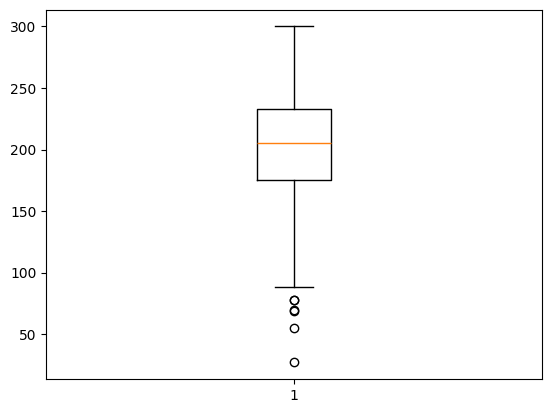

In [30]:
plt.boxplot(df['total score'])
plt.show()

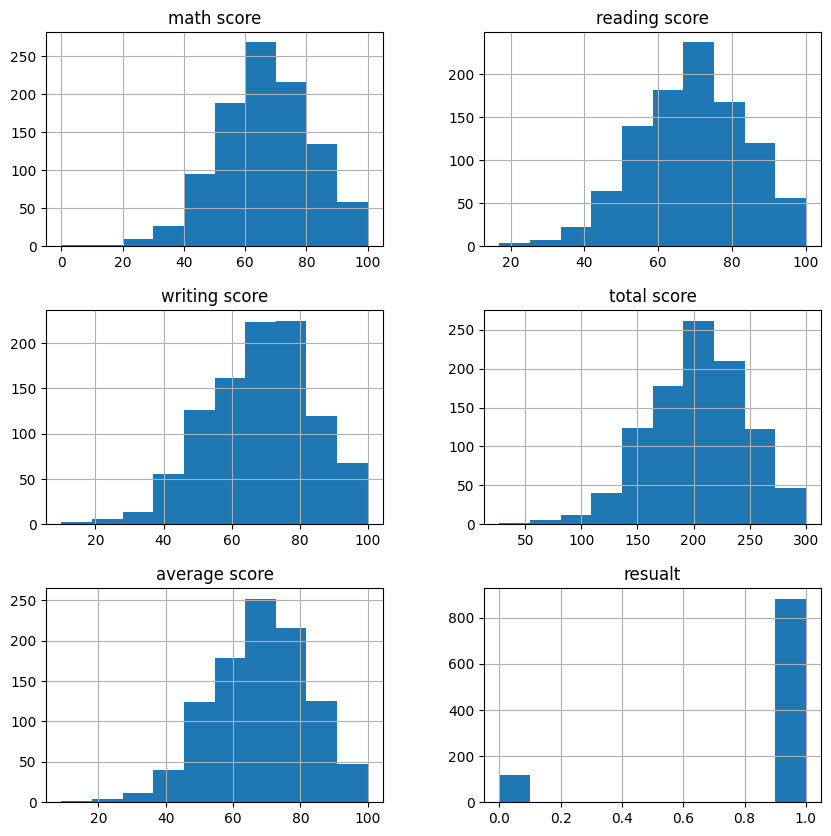

In [31]:
#bütün genel datanın görünüşü
df.hist(figsize=(10,10));

<Axes: xlabel='writing score', ylabel='math score'>

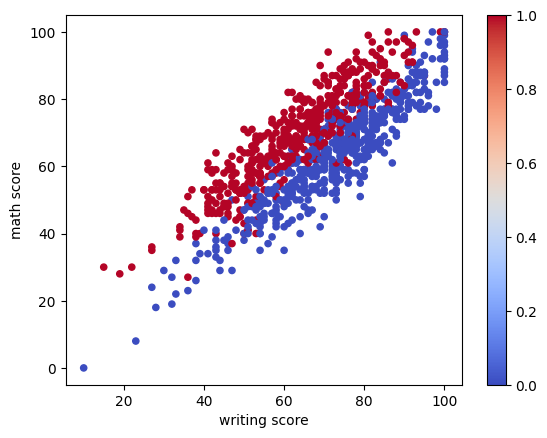

In [32]:
df.plot.scatter(
    x='writing score',
    y='math score',
    c=df['gender'].map({'female': 0, 'male': 1}),
    cmap='coolwarm'
)


Text(0, 0.5, 'total score')

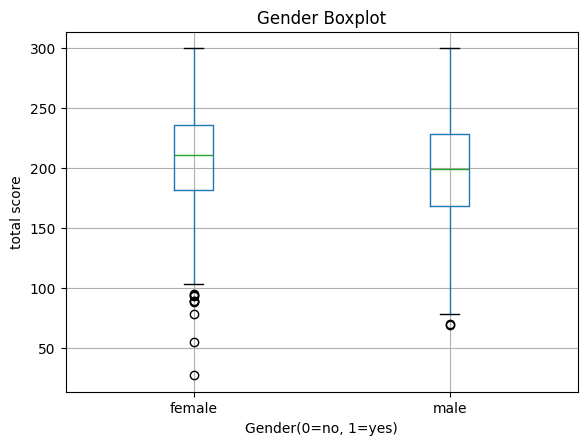

In [33]:
df.boxplot(column='total score',by='gender')
plt.suptitle('')
plt.title('Gender Boxplot')
plt.xlabel('Gender(0=no, 1=yes)')
plt.ylabel('total score')

In [34]:
#veriler arasındakı corelasyon elegesi
corr = df.select_dtypes(include='number').corr()
corr


,math score,reading score,writing score,total score,average score,resualt
math score,1.000000,0.817580,0.802642,0.918746,0.918442,0.578166
reading score,0.817580,1.000000,0.954598,0.970331,0.970143,0.613112
writing score,0.802642,0.954598,1.000000,0.965667,0.965643,0.612141
total score,0.918746,0.970331,0.965667,1.000000,0.999820,0.631727
average score,0.918442,0.970143,0.965643,0.999820,1.000000,0.632261
resualt,0.578166,0.613112,0.612141,0.631727,0.632261,1.000000


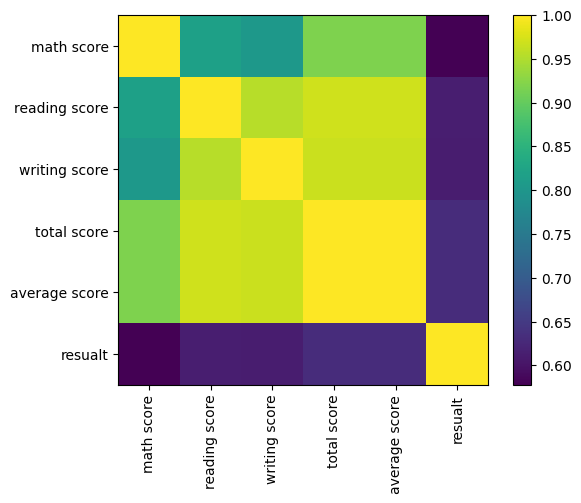

In [35]:
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns,rotation=90)
plt.yticks(range(len(corr)),corr.columns);

<BarContainer object of 2 artists>

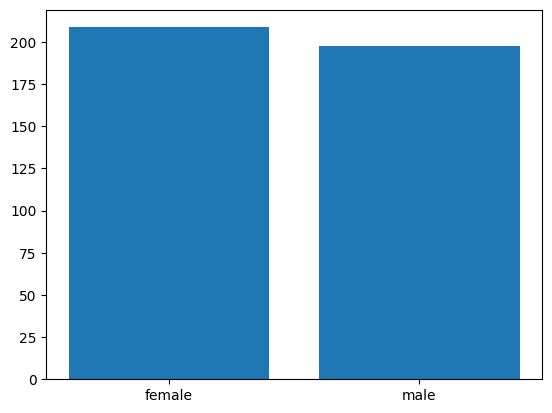

In [36]:
h = df.groupby('gender')['total score'].mean()
plt.bar(h.index, h.values)


<Axes: xlabel='parental level of education'>

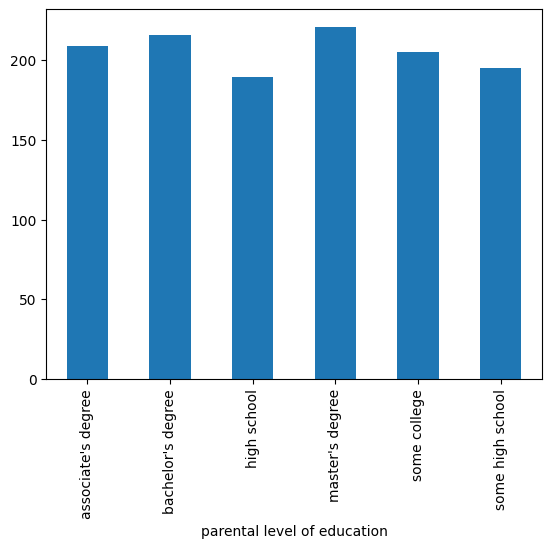

In [37]:
df.groupby('parental level of education')['total score'].mean().plot(kind='bar')

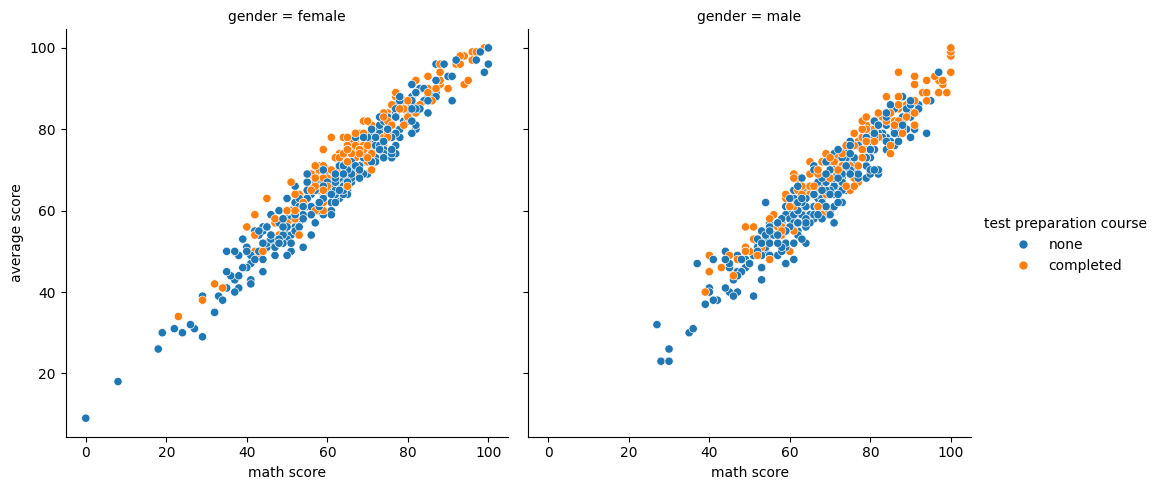

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(
    x='math score',
    y='average score',
    col='gender',                  # subplot için gender
    hue='test preparation course', # renk için kurs
    data=df,
    kind='scatter'                 # default scatter, line da olabilir
)

plt.show()


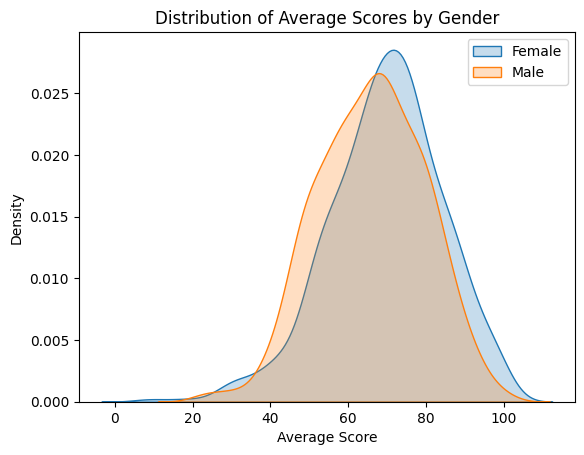

In [40]:
sns.kdeplot(df[df['gender']=='female']['average score'], fill=True, label='Female')
sns.kdeplot(df[df['gender']=='male']['average score'], fill=True, label='Male')
plt.xlabel('Average Score')
plt.ylabel('Density')
plt.title('Distribution of Average Scores by Gender')
plt.legend()
plt.show()



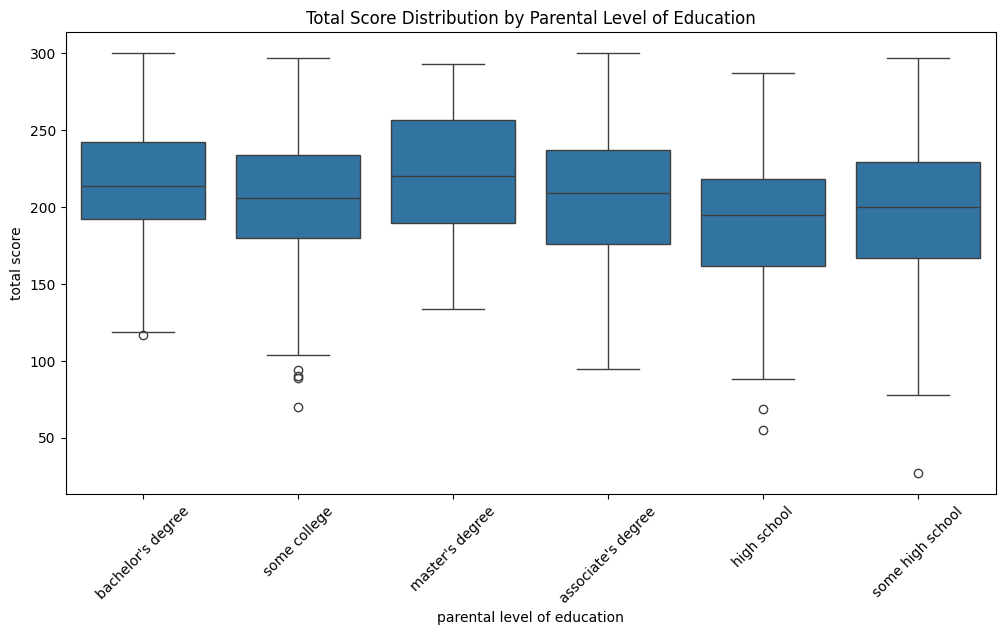

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education', y='total score', data=df)
plt.xticks(rotation=45)
plt.title('Total Score Distribution by Parental Level of Education')
plt.show()


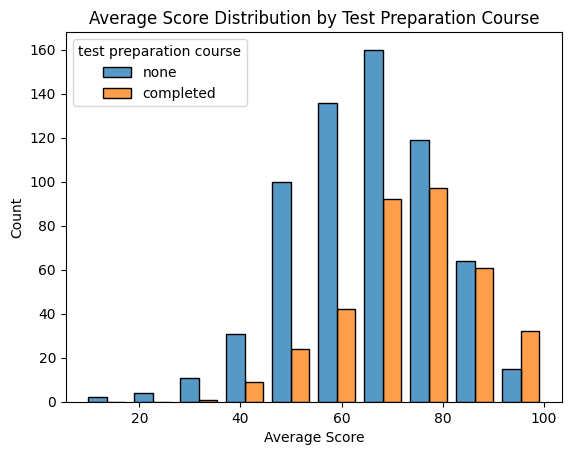

In [42]:
sns.histplot(
    x='average score',
    hue='test preparation course',
    data=df,
    multiple='dodge',
    shrink=0.8,
    bins=10
)
plt.xlabel('Average Score')
plt.ylabel('Count')
plt.title('Average Score Distribution by Test Preparation Course')
plt.show()


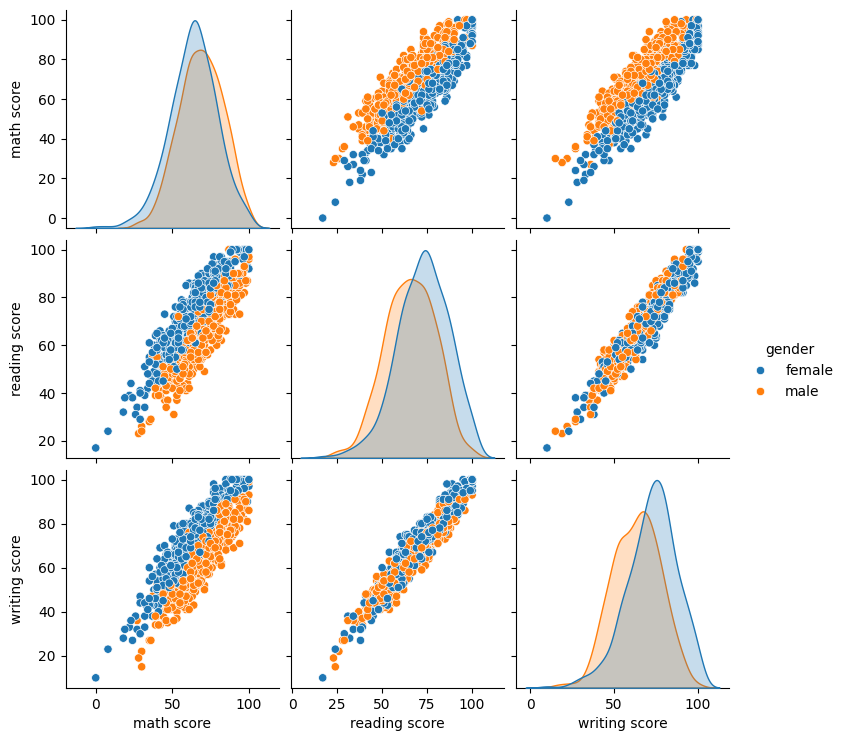

In [43]:
sns.pairplot(
    data=df,
    vars=['math score','reading score','writing score'],
    hue='gender'
)
plt.show()

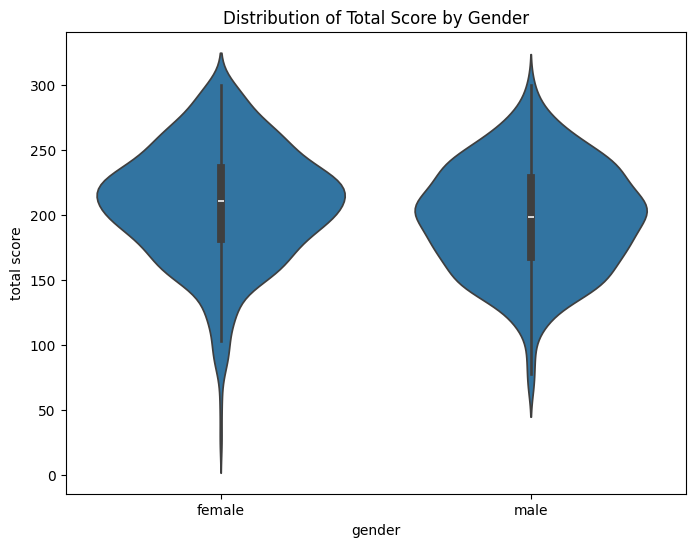

In [44]:
plt.figure(figsize=(8,6))
sns.violinplot(x='gender', y='total score', data=df)
plt.title('Distribution of Total Score by Gender')
plt.show()

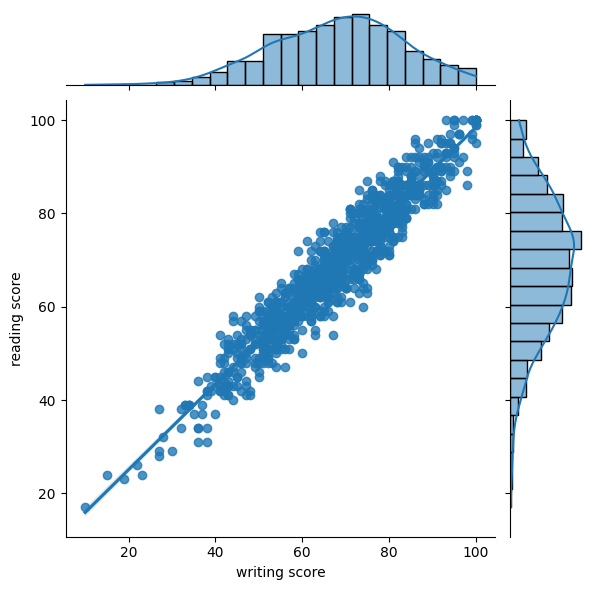

In [54]:
sns.jointplot(
    x='writing score',
    y='reading score',
    data=df,
    kind='reg',  # scatter + regresyon xətti
    height=6
)
plt.show()

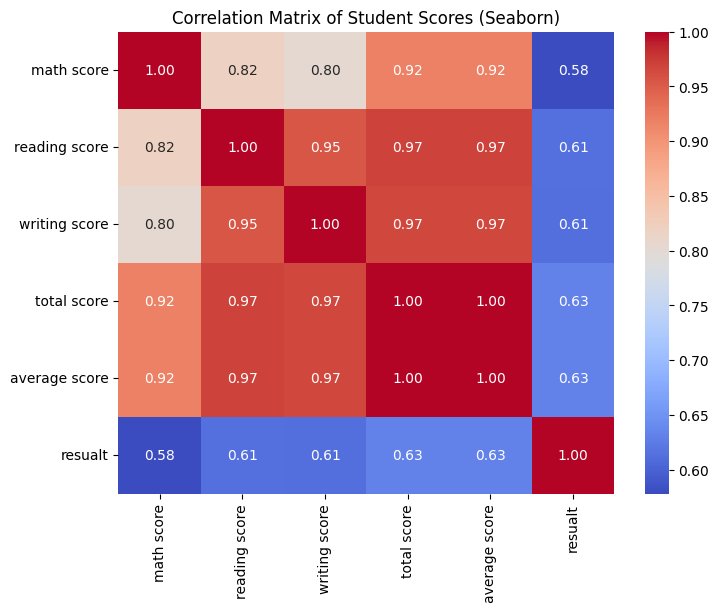

In [55]:
# Numeric kolonları seç ve korelasyonu hesapla
corr = df[['math score','reading score','writing score','total score','average score','resualt']].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Student Scores (Seaborn)')
plt.show()

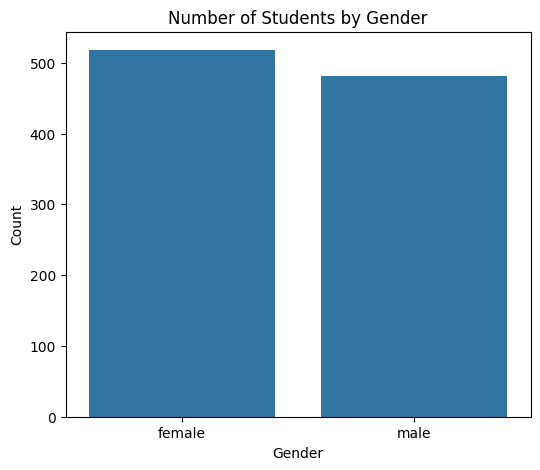

In [47]:
plt.figure(figsize=(6,5))
sns.countplot(x='gender', data=df)
plt.title('Number of Students by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

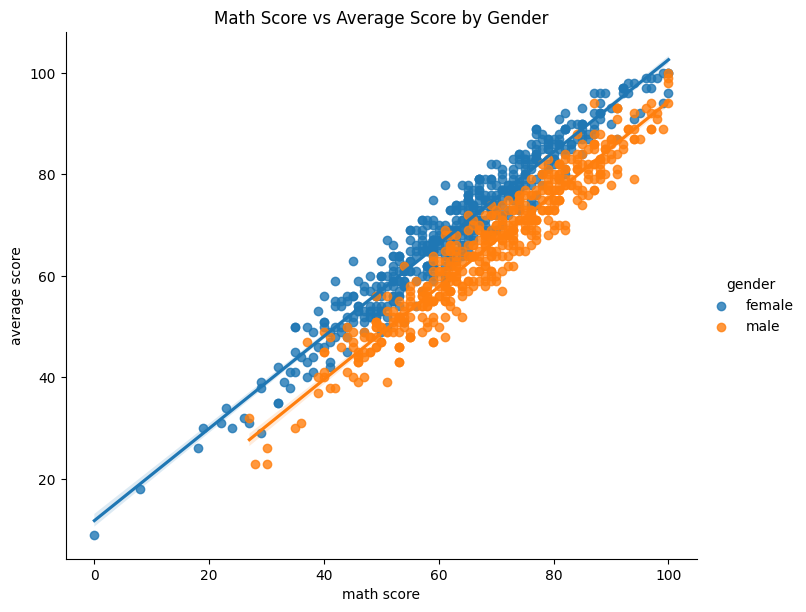

In [48]:
sns.lmplot(
    x='math score',
    y='average score',
    hue='gender',
    data=df,
    height=6,
    aspect=1.2
)
plt.title('Math Score vs Average Score by Gender')
plt.show()

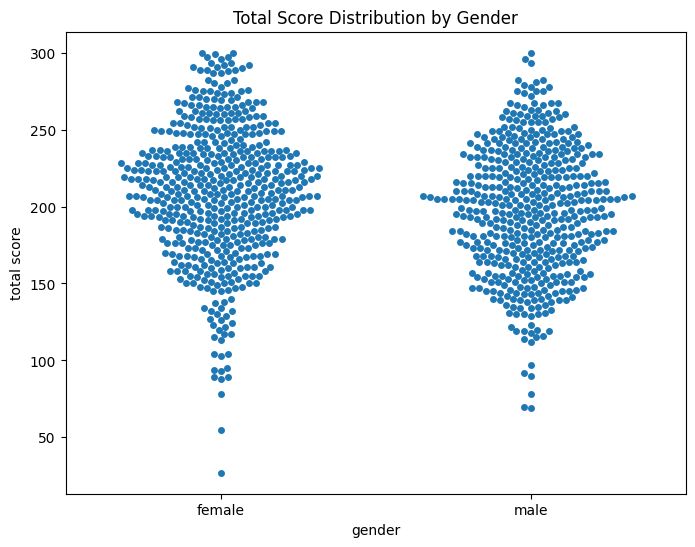

In [49]:
plt.figure(figsize=(8,6))
sns.swarmplot(x='gender', y='total score', data=df)
plt.title('Total Score Distribution by Gender')
plt.show()
#Swarm plot göstərir ki, qız və oğlan tələbələrin total skorları ümumilikdə oxşardır,
#lakin qızların bəzi yüksək skor outlier-ları mövcuddur.
#Bu qrafik hər bir tələbənin skorunu ayrıca görməyə imkan verir və dağılımın daha dəqiq təsvirini verir.

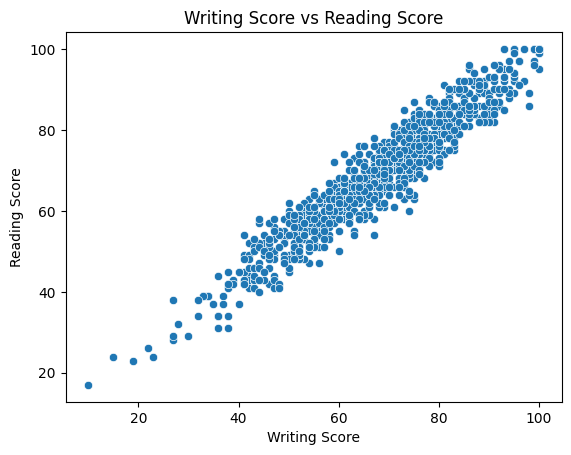

In [50]:
sns.scatterplot(
    x='writing score',
    y='reading score',
    data=df
)
plt.xlabel('Writing Score')
plt.ylabel('Reading Score')
plt.title('Writing Score vs Reading Score')
plt.show()


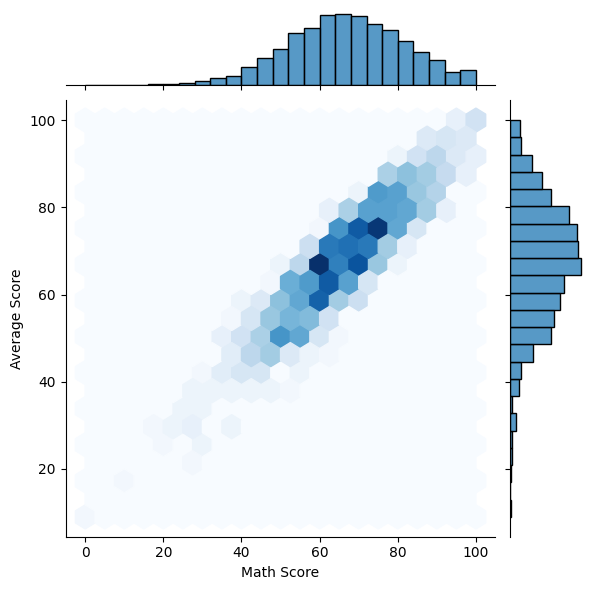

In [51]:
sns.jointplot(
    x='math score',
    y='average score',
    data=df,
    kind='hex',
    gridsize=20,
    cmap='Blues'
)
plt.xlabel('Math Score')
plt.ylabel('Average Score')
plt.show()


Vizuallaştırma

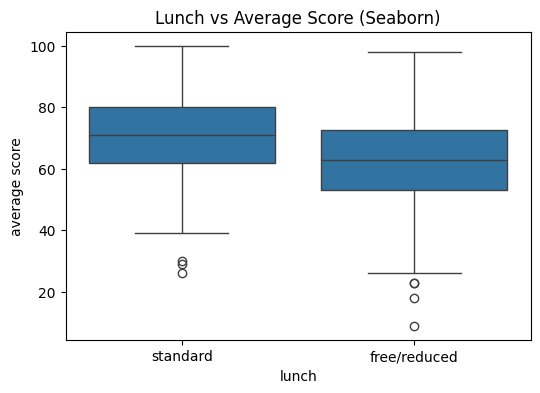

In [52]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='lunch',y='average score')
plt.title("Lunch vs Average Score (Seaborn)")
plt.show()

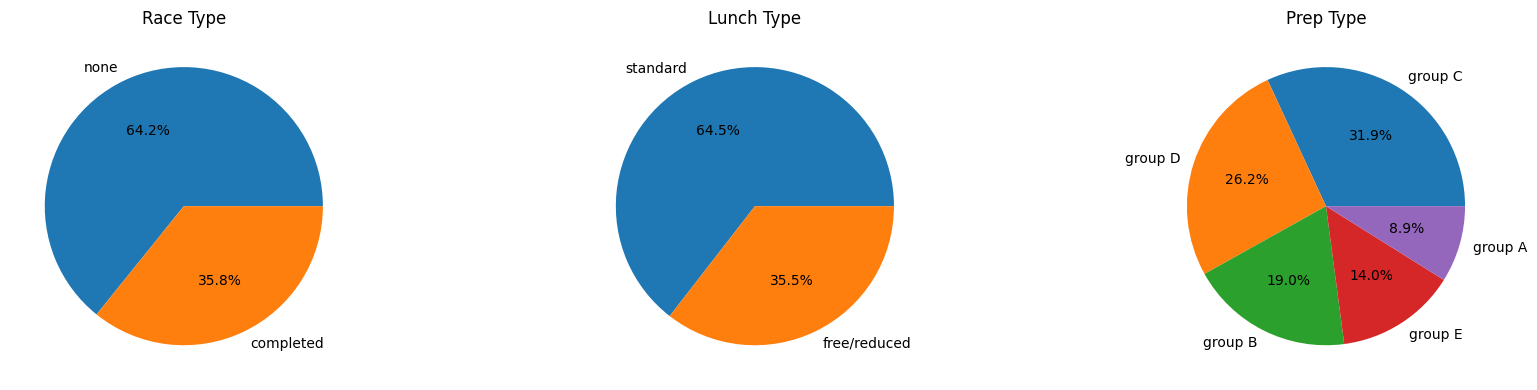

In [59]:
lunch_counts=df['lunch'].value_counts()
race_counts=df['test preparation course'].value_counts()
prep_counts=df['race/ethnicity'].value_counts()

plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.pie(race_counts,labels=race_counts.index, autopct="%1.1f%%")
plt.title("Race Type")

plt.subplot(1,3,2)
plt.pie(lunch_counts,labels=lunch_counts.index, autopct="%1.1f%%")
plt.title("Lunch Type")

plt.subplot(1,3,3)
plt.pie(prep_counts,labels=prep_counts.index, autopct="%1.1f%%")
plt.title("Prep Type")

plt.tight_layout()
plt.show()

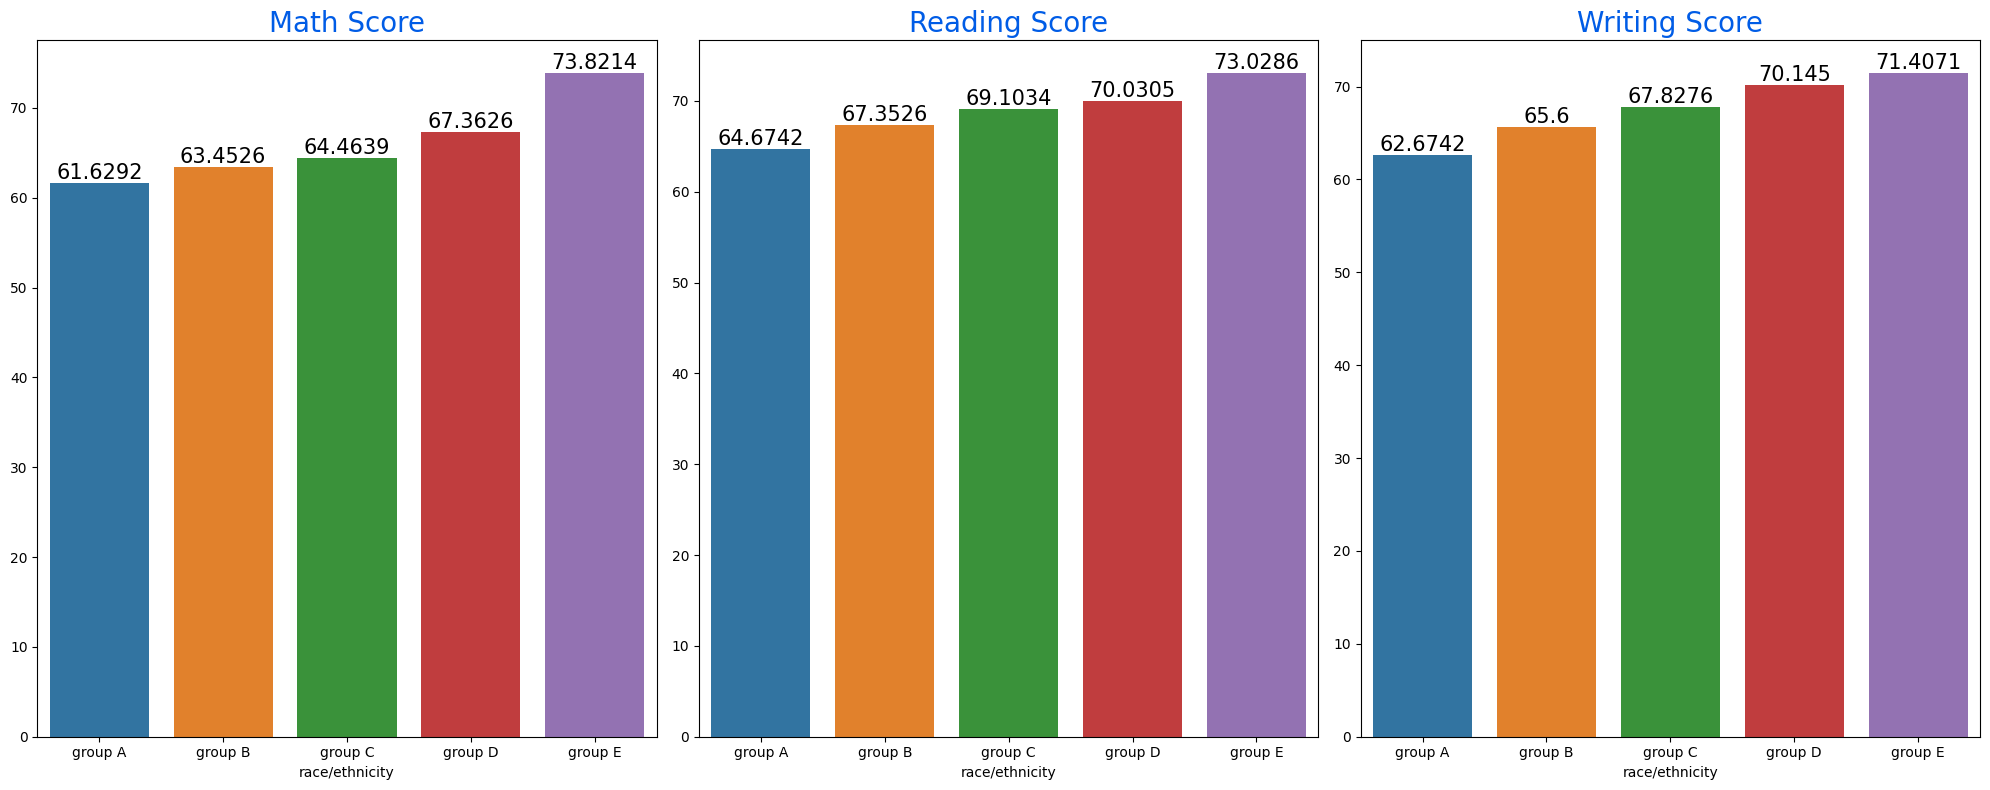

In [64]:
cols = ['math score', 'reading score', 'writing score']
Group_data2=df.groupby('race/ethnicity')

f, ax = plt.subplots(1, 3, figsize=(20,8))

for i, col in enumerate(cols): #indexini ve deyerini qaytarir
    means = Group_data2[col].mean()

    sns.barplot(
        x=means.index,
        y=means.values,
        hue=means.index,   # <-- palette işləməsi üçün tələb olunur,her bar ferqli reng alsin
        palette='tab10',
        legend=False,
        ax=ax[i]
    )

    ax[i].set_title(f'{col.title()}', color='#005ce6', size=20)

    for container in ax[i].containers:
        ax[i].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()

/tmp/ipython-input-746192141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['parental level of education'], palette = 'Blues', hue=None, legend=False)


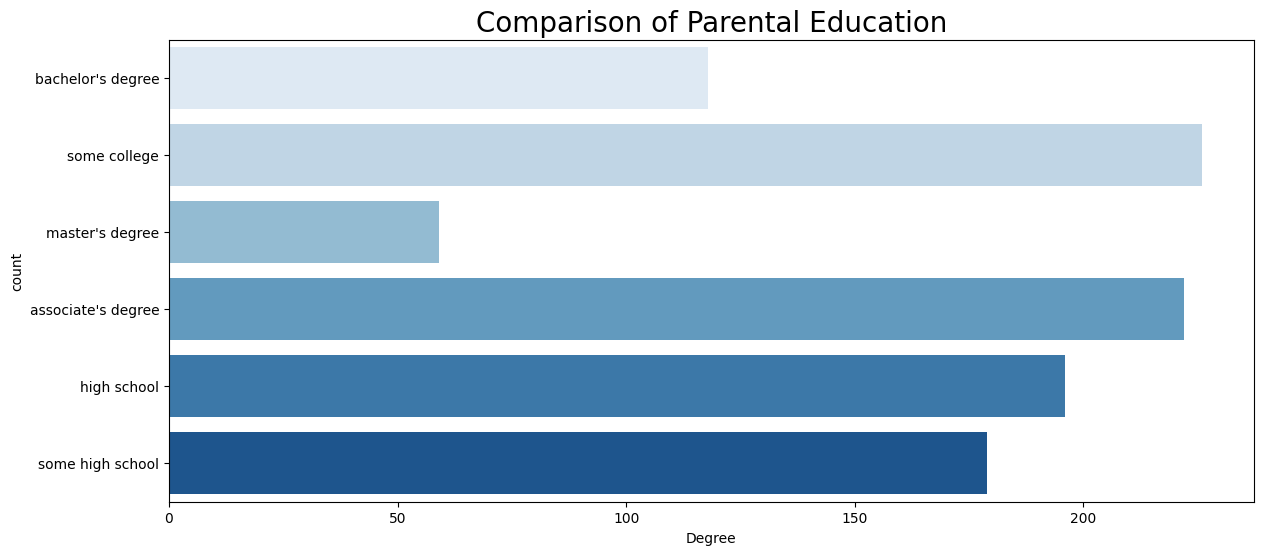

In [66]:
plt.figure(figsize=(14, 6))
sns.countplot(df['parental level of education'], palette = 'Blues', hue=None, legend=False)
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show();

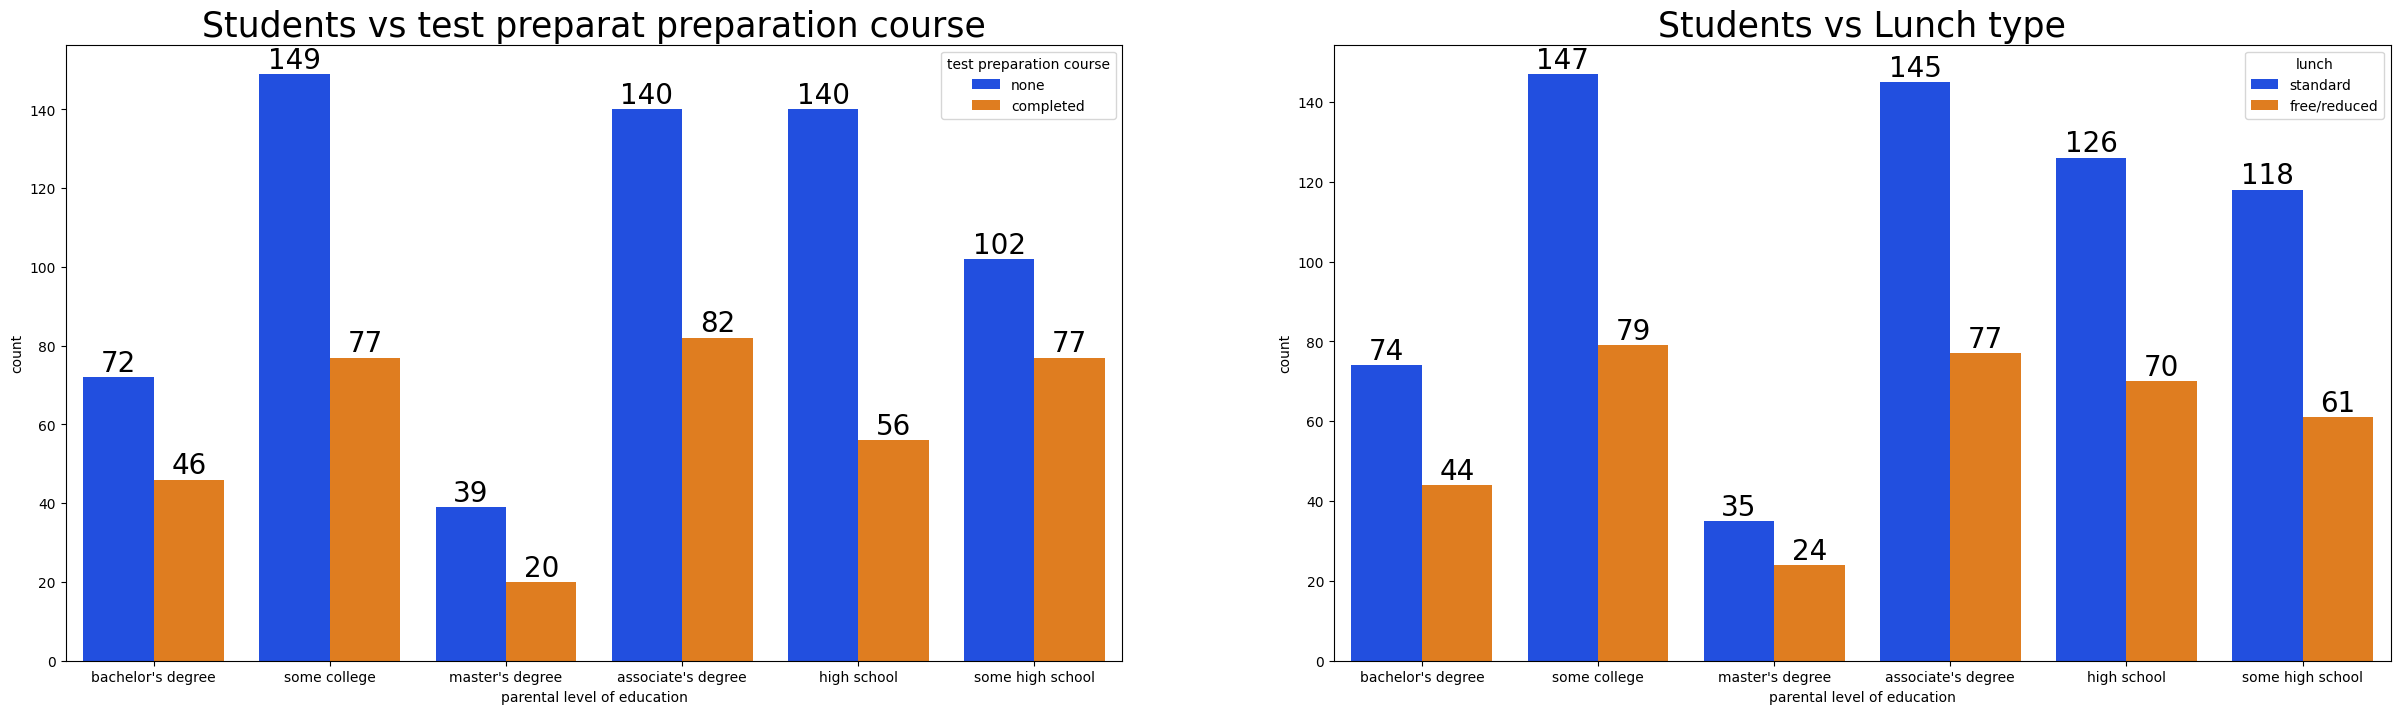

In [71]:
f,ax=plt.subplots(1,2, figsize=(30,8))
sns .countplot (x=df['parental level of education'],data=df,palette='bright',hue='test preparation course',ax=ax[0])
ax[0].set_title('Students vs test preparat preparation course' ,color='black', size=25)
for container in ax[0].containers:
  ax [0].bar_label(container, color='black', size=20)
sns.countplot (x=df['parental level of education'], data=df, palette='bright', hue='lunch', ax=ax[1])
ax[1].set_title('Students vs Lunch type',color='black',size=25)
for container in ax[1].containers:
  ax[1].bar_label(container, color='black', size=20)